## General Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cm
from salishsea_tools import viz_tools
import matplotlib as mpl
import pandas as pd
import netCDF4 as nc
import shapely.geometry
from shapely.geometry import box
from shapely.ops import unary_union
from datetime import datetime
from matplotlib.dates import DateFormatter
import matplotlib.colors as colors

In [2]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]
area = ((1-tmask) * mesh.e1t[0] * mesh.e2t[0]).rename({'z':'depth', 'y':'gridY', 'x':'gridX'})[0]
volume = ((1-tmask) * mesh.e3t_0[0] * mesh.e1t[0] * mesh.e2t[0]).rename({'z':'depth', 'y':'gridY', 'x':'gridX'})
max_depth = bathy.Bathymetry.rename({'y':'gridY', 'x':'gridX'})
mean_depth = np.nanmean(max_depth.to_numpy())

In [3]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')
mesh_mask_depth_var='gdept_0'

thalweg_file = '/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)
mesh_mask_depth_var='gdept_0'
depth = mesh.variables[mesh_mask_depth_var][:]

## Field Imports and Transformations

In [4]:
# dimensions: gridY, gridX, time
sum_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2023, 2023))
sum_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2022, 2022))
sum_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2021, 2021))
sum_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2020, 2020))
sum_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2019, 2019))

In [5]:
sum_all_mon = xr.concat([sum_2019_mon, sum_2020_mon, sum_2021_mon, sum_2022_mon, sum_2023_mon], dim='time')

In [6]:
# dimensions: gridY, gridX, time
sum_2023 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2023, 2023))
sum_2022 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2022, 2022))
sum_2021 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2021, 2021))
sum_2020 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2020, 2020))
sum_2019 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2019, 2019))

In [7]:
# dimensions: gridY, gridX, time
avgdepth_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_avg_depth.nc'.format(2023, 2023))
avgdepth_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_avg_depth.nc'.format(2022, 2022))
avgdepth_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_avg_depth.nc'.format(2021, 2021))
avgdepth_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_avg_depth.nc'.format(2020, 2020))
avgdepth_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_avg_depth.nc'.format(2019, 2019))

In [8]:
avgdepth_all_mon = xr.concat([avgdepth_2019_mon, avgdepth_2020_mon, avgdepth_2021_mon, avgdepth_2022_mon, avgdepth_2023_mon], dim='time')

In [9]:
# dimensions: gridY, gridX, time
vol_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2023, 2023))
vol_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2022, 2022))
vol_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2021, 2021))
vol_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2020, 2020))
vol_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2019, 2019))

## Functions

In [10]:
year_lines = ['-', (0, (1, 1)), (5, (10, 3)), (0, (5, 1)), (0, (3, 1, 1, 1, 1, 1))]

In [11]:
def make_1d(ds, reg_list):
    all_1d = ds.isel(gridY=slice(reg_list[0][0], reg_list[0][1]), gridX=slice(reg_list[0][2], reg_list[0][3])).sum(dim='gridY').sum(dim='gridX')
    for region in reg_list[1:]:
        next = ds.isel(gridY=slice(region[0], region[1]), gridX=slice(region[2], region[3])).sum(dim='gridY').sum(dim='gridX')
        all_1d = all_1d + next

    return all_1d

In [12]:
def make_flattened_mean(ds, reg_list):
    all_points = ds.isel(gridY=slice(reg_list[0][0], reg_list[0][1]), gridX=slice(reg_list[0][2], reg_list[0][3])).to_numpy().flatten()
    for region in reg_list[1:]:
        next = ds.isel(gridY=slice(region[0], region[1]), gridX=slice(region[2], region[3])).to_numpy().flatten()
        all_points = np.append(all_points, next)
    all_points = all_points[~np.isnan(all_points)]
    all_point_mean = all_points.mean()

    return all_point_mean
    

In [13]:
def plot_box(ax, corn, colour):
    ax.plot([corn[2], corn[3], corn[3], corn[2], corn[2]], 
            [corn[0], corn[0], corn[1], corn[1], corn[0]], '-', color=colour)

In [14]:
def make_m_and_prop_mon(regions, river):
    total_area = make_1d(area, regions)

    dim1_2019_mon = make_1d(sum_2019_mon, regions)  # dim1 is the sum of all the water in the given regions. is 1d in time for each river
    dim1_2020_mon = make_1d(sum_2020_mon, regions)
    dim1_2021_mon = make_1d(sum_2021_mon, regions)
    dim1_2022_mon = make_1d(sum_2022_mon, regions)
    dim1_2023_mon = make_1d(sum_2023_mon, regions)
    dim1_all_mon = xr.concat([dim1_2019_mon, dim1_2020_mon, dim1_2021_mon, dim1_2022_mon, dim1_2023_mon], dim='time')

    meters1_all_mon = dim1_all_mon[river] / total_area

    totals_all_mon = dim1_all_mon.to_array().sum(dim="variable")
    prop_all_mon = dim1_all_mon[river] / totals_all_mon

    return meters1_all_mon, prop_all_mon

In [15]:
def make_m_and_prop(regions, river):
    total_area = make_1d(area, regions)

    dim1_2019 = make_1d(sum_2019, regions)  # dim1 is the sum of all the water in the given regions. is 1d in time for each river
    dim1_2020 = make_1d(sum_2020, regions)
    dim1_2021 = make_1d(sum_2021, regions)
    dim1_2022 = make_1d(sum_2022, regions)
    dim1_2023 = make_1d(sum_2023, regions)
    dim1_all = xr.concat([dim1_2019, dim1_2020, dim1_2021, dim1_2022, dim1_2023], dim='time')

    meters1_all = dim1_all[river] / total_area

    totals_all = dim1_all.to_array().sum(dim="variable")
    prop_all = dim1_all[river] / totals_all

    return meters1_all, prop_all

## Regional Meters and Proportion

In [16]:
def plot_poly(ax, poly, color):
    x,y = poly.exterior.xy
    ax.plot(x,y,color=color)

In [17]:
def make_poly4corn(y0, y1, x0, x1):
    return shapely.geometry.Polygon([(x0, y0), (x1, y0), (x1, y1), (x0, y1)])

In [18]:
tablist_nogrey = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan', 'darkgrey']

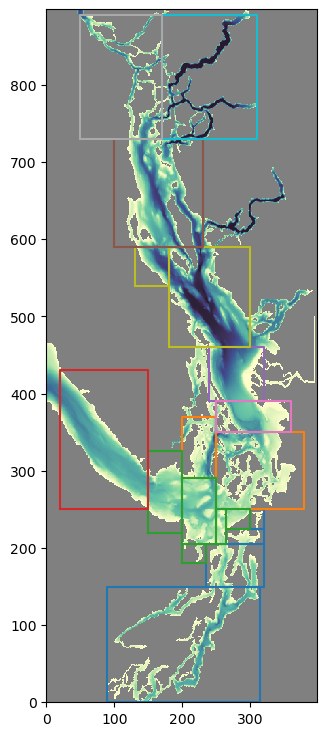

In [19]:
## my boxes
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
mycmap = cm.deep
mycmap.set_bad('grey')
ax.pcolormesh(bathy['Bathymetry'], cmap=mycmap)
viz_tools.set_aspect(ax);

## Puget Sound
PS_main = [0, 150, 90, 315]
plot_box(ax, PS_main, tablist_nogrey[0])
PS_AIWB = [150, 205, 235, 320]
plot_box(ax, PS_AIWB, tablist_nogrey[0])
PS_WB = [205, 225, 265, 320]
plot_box(ax, PS_WB, tablist_nogrey[0])
PS_DP = [225, 250, 300, 320]
plot_box(ax, PS_DP, tablist_nogrey[0])

## Mixing Region
mixing_region1 = [290, 370, 200, 250]
plot_box(ax, mixing_region1, tablist_nogrey[1])
mixing_region2 = [250, 350, 250, 380]
plot_box(ax, mixing_region2, tablist_nogrey[1])

## Juan de Fuca
JdF2 = [220, 325, 150, 200]
plot_box(ax, JdF2, tablist_nogrey[2])
JdF3 = [205, 290, 200, 250]
plot_box(ax, JdF3, tablist_nogrey[2])
JdF4 = [180, 205, 200, 235]
plot_box(ax, JdF4, tablist_nogrey[2])
JdF5 = [205, 250, 250, 265]
plot_box(ax, JdF5, tablist_nogrey[2])
JdF6 = [225, 250, 265, 300]
plot_box(ax, JdF6, tablist_nogrey[2])
JdF1 = [250, 430, 20, 150]
plot_box(ax, JdF1, tablist_nogrey[3])  ## West

## Fraser River Plume
Fraser_plume = [390, 460, 240, 320]
plot_box(ax, Fraser_plume, tablist_nogrey[4])

## Strait of Georgia
SoG_south = [350, 390, 250, 360]
plot_box(ax, SoG_south, tablist_nogrey[6])
SoG_center1 = [460, 590, 180, 300]
plot_box(ax, SoG_center1, tablist_nogrey[7])
SoG_center2 = [540, 590, 130, 180]
plot_box(ax, SoG_center2, tablist_nogrey[7])
SoG_north = [590, 730, 100, 230]
plot_box(ax, SoG_north, tablist_nogrey[5])

## Northern Inlets
Inlets = [730, 890, 170, 310]
plot_box(ax, Inlets, tablist_nogrey[8])
Johnstone = [730, 890, 50, 170]
plot_box(ax, Johnstone, tablist_nogrey[9])

PS_all = [PS_main, PS_AIWB, PS_WB, PS_DP]
MR_all = [mixing_region1, mixing_region2]
JdFW_all = [JdF1]
JdFE_all = [JdF2, JdF3, JdF4, JdF5, JdF6]
FRP_all = [Fraser_plume]
SoGN_all = [SoG_north]
SoGS_all = [SoG_south]
SoGC_all = [SoG_center1, SoG_center2]
SaS_all = [Inlets, Johnstone]
Inlets_all = [Inlets]
Johnstone_all = [Johnstone]
regions_all = [PS_all, MR_all, JdFW_all, JdFE_all, FRP_all, SoGN_all, SoGS_all, SoGC_all, Inlets, Johnstone]

## Create Datasets to Save (comment after first use)

In [20]:
meters_PS_mon, prop_PS_mon = make_m_and_prop_mon(PS_all, 'elwha_river')
meters_MR_mon, prop_MR_mon = make_m_and_prop_mon(MR_all, 'elwha_river')
meters_JdFE_mon, prop_JdFE_mon = make_m_and_prop_mon(JdFE_all, 'elwha_river')
meters_JdFW_mon, prop_JdFW_mon = make_m_and_prop_mon(JdFW_all, 'elwha_river')
meters_FRP_mon, prop_FRP_mon = make_m_and_prop_mon(FRP_all, 'elwha_river')
meters_SoGN_mon, prop_SoGN_mon = make_m_and_prop_mon(SoGN_all, 'elwha_river')
meters_SoGS_mon, prop_SoGS_mon = make_m_and_prop_mon(SoGS_all, 'elwha_river')
meters_SoGC_mon, prop_SoGC_mon = make_m_and_prop_mon(SoGC_all, 'elwha_river')
meters_SaS_mon, prop_SaS_mon = make_m_and_prop_mon(SaS_all, 'elwha_river')
meters_Inlets_mon, prop_Inlets_mon = make_m_and_prop_mon([Inlets], 'elwha_river')
meters_Johnstone_mon, prop_Johnstone_mon = make_m_and_prop_mon([Johnstone], 'elwha_river')

In [21]:
meters_PS, prop_PS = make_m_and_prop(PS_all, 'elwha_river')
meters_MR, prop_MR = make_m_and_prop(MR_all, 'elwha_river')
meters_JdFE, prop_JdFE = make_m_and_prop(JdFE_all, 'elwha_river')
meters_JdFW, prop_JdFW = make_m_and_prop(JdFW_all, 'elwha_river')
meters_FRP, prop_FRP = make_m_and_prop(FRP_all, 'elwha_river')
meters_SoGN, prop_SoGN = make_m_and_prop(SoGN_all, 'elwha_river')
meters_SoGS, prop_SoGS = make_m_and_prop(SoGS_all, 'elwha_river')
meters_SoGC, prop_SoGC = make_m_and_prop(SoGC_all, 'elwha_river')
meters_SaS, prop_SaS = make_m_and_prop(SaS_all, 'elwha_river')
meters_Inlets, prop_Inlets = make_m_and_prop([Inlets], 'elwha_river')
meters_Johnstone, prop_Johnstone = make_m_and_prop([Johnstone], 'elwha_river')

In [22]:
meters_ds_int_mon = xr.Dataset({
    'PS': meters_PS_mon,
    'MR': meters_MR_mon,
    'JdFE': meters_JdFE_mon,
    'JdFW': meters_JdFW_mon,
    'FRP': meters_FRP_mon,
    'SoGN': meters_SoGN_mon,
    'SoGS': meters_SoGS_mon,
    'SoGC': meters_SoGC_mon,
    # 'SaS': meters_SaS_mon
    # 'PS': meters_ds_mon['PS'],
    # 'MR': meters_ds_mon['MR'],
    # 'JdFE': meters_ds_mon['JdFE'],
    # 'JdFW': meters_ds_mon['JdFW'],
    # 'FRP': meters_ds_mon['FRP'],
    # 'SoGN': meters_ds_mon['SoGN'],
    # 'SoGS': meters_ds_mon['SoGS'],
    # 'SoGC': meters_ds_mon['SoGC'],
    'Inlets': meters_Inlets_mon,
    'Johnstone': meters_Johnstone_mon
})
formatted_time = meters_ds_int_mon['time'].dt.strftime('%m-%d-%Y')
meters_ds_mon = xr.Dataset()
for var in meters_ds_int_mon.data_vars:
    meters_ds_mon[var] = xr.DataArray(
        meters_ds_int_mon[var].values,
        coords={'time': formatted_time},
        dims=meters_ds_int_mon[var].dims,
        name=meters_ds_int_mon[var].name,
        attrs=meters_ds_int_mon[var].attrs
    )
meters_ds_mon.attrs = meters_ds_int_mon.attrs

# # prop_ds_int_mon = xr.Dataset({
# #     'PS': prop_PS_mon,
# #     'MR': prop_MR_mon,
# #     'JdFE': prop_JdFE_mon,
# #     'JdFW': prop_JdFW_mon,
# #     'FRP': prop_FRP_mon,
# #     'SoGN': prop_SoGN_mon,
# #     'SoGS': prop_SoGS_mon,
# #     'SoGC': prop_SoGC_mon,
# #     # 'SaS': prop_SaS_mon
# #     'Inlets': prop_Inlets_mon,
# #     'Johnstone': prop_Johnstone_mon
# # })
# # formatted_time = prop_ds_int_mon['time'].dt.strftime('%m-%d-%Y')
# # prop_ds_mon = xr.Dataset()
# # for var in prop_ds_int_mon.data_vars:
# #     prop_ds_mon[var] = xr.DataArray(
# #         prop_ds_int_mon[var].values,
# #         coords={'time': formatted_time},
# #         dims=prop_ds_int_mon[var].dims,
# #         name=prop_ds_int_mon[var].name,
# #         attrs=prop_ds_int_mon[var].attrs
# #     )
# # prop_ds_mon.attrs = prop_ds_int_mon.attrs

meters_ds_int_mon.to_netcdf('elwha_monthly_m_freshwater_split.nc')
# # prop_ds_int_mon.to_netcdf('Elwha_monthly_prop_freshwater_split.nc')

In [23]:
meters_ds_mon = xr.open_dataset('elwha_monthly_m_freshwater_split.nc')
# prop_ds_mon = xr.open_dataset('snohomish_monthly_prop_freshwater.nc')

In [24]:
meters_ds_int = xr.Dataset({
    'PS': meters_PS,
    'MR': meters_MR,
    'JdFE': meters_JdFE,
    'JdFW': meters_JdFW,
    'FRP': meters_FRP,
    'SoGN': meters_SoGN,
    'SoGS': meters_SoGS,
    'SoGC': meters_SoGC,
    # 'SaS': meters_SaS
    # 'PS': meters_ds['PS'],
    # 'MR': meters_ds['MR'],
    # 'JdFE': meters_ds['JdFE'],
    # 'JdFW': meters_ds['JdFW'],
    # 'FRP': meters_ds['FRP'],
    # 'SoGN': meters_ds['SoGN'],
    # 'SoGS': meters_ds['SoGS'],
    # 'SoGC': meters_ds['SoGC'],
    'Inlets': meters_Inlets,
    'Johnstone': meters_Johnstone
})
formatted_time = meters_ds_int['time'].dt.strftime('%m-%d-%Y')
meters_ds = xr.Dataset()
for var in meters_ds_int.data_vars:
    meters_ds[var] = xr.DataArray(
        meters_ds_int[var].values,
        coords={'time': formatted_time},
        dims=meters_ds_int[var].dims,
        name=meters_ds_int[var].name,
        attrs=meters_ds_int[var].attrs
    )
meters_ds.attrs = meters_ds_int.attrs

# # prop_ds_int = xr.Dataset({
# #     'PS': prop_PS,
# #     'MR': prop_MR,
# #     'JdFE': prop_JdFE,
# #     'JdFW': prop_JdFW,
# #     'FRP': prop_FRP,
# #     'SoGN': prop_SoGN,
# #     'SoGS': prop_SoGS,
# #     'SoGC': prop_SoGC,
# #     'SaS': prop_SaS
# # })
# # formatted_time = prop_ds_int['time'].dt.strftime('%m-%d-%Y')
# # prop_ds = xr.Dataset()
# # for var in prop_ds_int.data_vars:
# #     prop_ds[var] = xr.DataArray(
# #         prop_ds_int[var].values,
# #         coords={'time': formatted_time},
# #         dims=prop_ds_int[var].dims,
# #         name=prop_ds_int[var].name,
# #         attrs=prop_ds_int[var].attrs
# #     )
# # prop_ds.attrs = prop_ds_int.attrs

meters_ds_int.to_netcdf('elwha_daily_m_freshwater_split.nc')
# # prop_ds_int.to_netcdf('snohomish_daily_prop_freshwater_split.nc')

In [25]:
meters_ds = xr.open_dataset('elwha_daily_m_freshwater_split.nc')
# prop_ds = xr.open_dataset('snohomish_daily_prop_freshwater.nc')

In [26]:
regions_list = list(meters_ds.keys())

In [27]:
avg_depth_dict = {
    'PS': make_flattened_mean(max_depth, PS_all),
    'MR': make_flattened_mean(max_depth, MR_all),
    'JdFE': make_flattened_mean(max_depth, JdFE_all),
    'JdFW': make_flattened_mean(max_depth, JdFW_all),
    'FRP': make_flattened_mean(max_depth, FRP_all),
    'SoGN': make_flattened_mean(max_depth, SoGN_all),
    'SoGS': make_flattened_mean(max_depth, SoGS_all),
    'SoGC': make_flattened_mean(max_depth, SoGC_all),
    # 'SaS': make_flattened_mean(max_depth, SaS_all),
    'Inlets': make_flattened_mean(max_depth, [Inlets]),
    'Johnstone': make_flattened_mean(max_depth, [Johnstone])}

In [28]:
# for region in regions_list:
#     print(region + ': ' + str(round(avg_depth_dict[region], 0))[:-2])

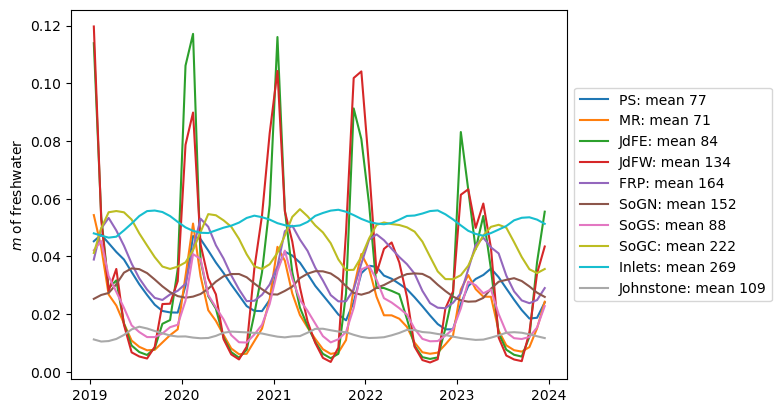

In [29]:
for idx in np.arange(len(regions_list)):
    region = regions_list[idx]
    plt.plot(meters_ds_mon['time'], meters_ds_mon[region], label=region + ': mean ' + str(round(avg_depth_dict[region], 0))[:-2], c=tablist_nogrey[idx])
plt.ylabel(r'$m$ of freshwater')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

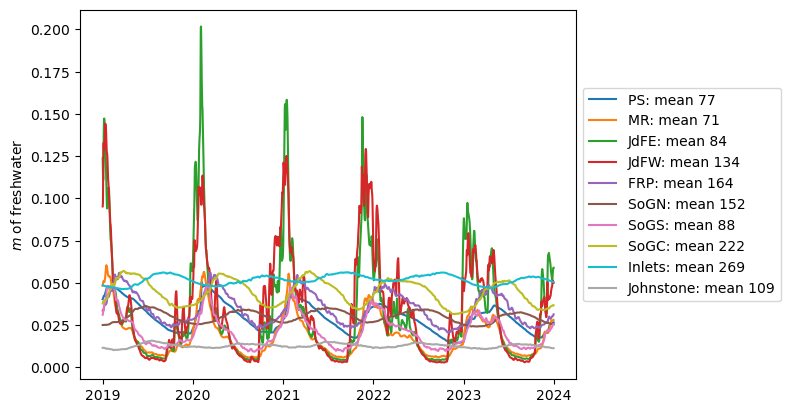

In [30]:
for idx in np.arange(len(regions_list)):
    region = regions_list[idx]
    plt.plot(meters_ds['time'], meters_ds[region], label=region + ': mean ' + str(round(avg_depth_dict[region], 0))[:-2], c=tablist_nogrey[idx])

# plt.plot(meters_ds['time'], meters_straits, label='straits', c='k')
# plt.plot(meters_ds['time'], meters_sounds, label='sounds', c='k', linestyle='--')
plt.ylabel(r'$m$ of freshwater')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [31]:
def create_exact_outline(boxes):
    """
    Create a polygon outline that follows the exact boundaries of the provided boxes.

    Parameters:
        boxes (list of list): List of boxes, where each box is [x1, x2, y1, y2].

    Returns:
        shapely.geometry.Polygon: A polygon representing the outline of all boxes.
    """
    # Convert each box to a Shapely Polygon
    polygons = [box(xmin, ymin, xmax, ymax) for ymin, ymax, xmin, xmax in boxes]
    
    # Merge all polygons into a single geometry
    merged_polygon = unary_union(polygons)
    
    # Ensure the result is a Polygon or MultiPolygon and return it
    return merged_polygon

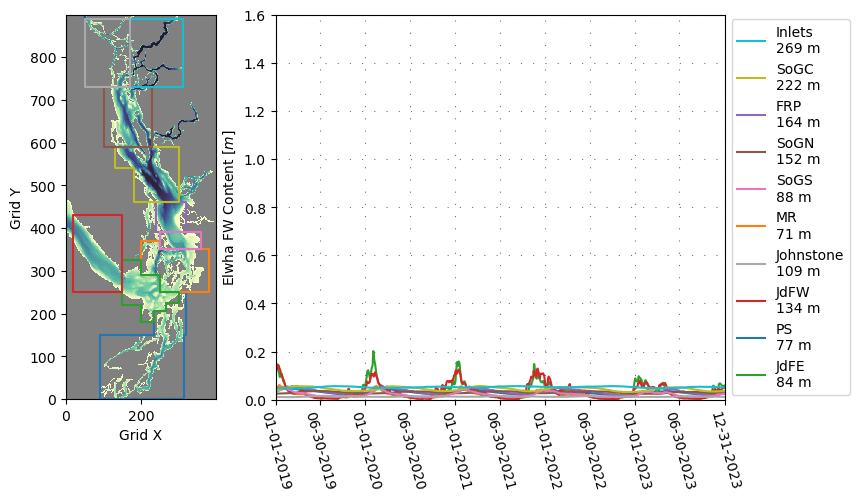

In [32]:
## my boxes
fig, ax = plt.subplots(1, 2, figsize=(8.5, 5), gridspec_kw={'width_ratios': [1,3]})
mycmap = cm.deep
mycmap.set_bad('grey')
ax[0].pcolormesh(bathy['Bathymetry'], cmap=mycmap)
viz_tools.set_aspect(ax[0]);

## Puget Sound
puget_sound_poly = create_exact_outline(PS_all)
plot_poly(ax[0], puget_sound_poly, tablist_nogrey[0])

## Mixing Region
MR_poly = create_exact_outline(MR_all)
plot_poly(ax[0], MR_poly, tablist_nogrey[1])

## Juan de Fuca
JdFE_poly = create_exact_outline(JdFE_all)
plot_poly(ax[0], JdFE_poly, tablist_nogrey[2])

JdFW_poly = create_exact_outline(JdFW_all)
plot_poly(ax[0], JdFW_poly, tablist_nogrey[3])

## Fraser River Plume
FRP_poly = create_exact_outline(FRP_all)
plot_poly(ax[0], FRP_poly, tablist_nogrey[4])

## Strait of Georgia
SoGS_poly = create_exact_outline(SoGS_all)
plot_poly(ax[0], SoGS_poly, tablist_nogrey[6])

SoGC_poly = create_exact_outline(SoGC_all)
plot_poly(ax[0], SoGC_poly, tablist_nogrey[7])

SoGN_poly = create_exact_outline(SoGN_all)
plot_poly(ax[0], SoGN_poly, tablist_nogrey[5])

## Northern Sounds
Inlets_poly = create_exact_outline(Inlets_all)
plot_poly(ax[0], Inlets_poly, tablist_nogrey[8])

Johnstone_poly = create_exact_outline(Johnstone_all)
plot_poly(ax[0], Johnstone_poly, tablist_nogrey[9])

ax[0].set_ylabel('Grid Y')
ax[0].set_xlabel('Grid X')

for idx in np.arange(len(regions_list)):
    region = regions_list[idx]
    ax[1].plot(meters_ds['time'].dt.strftime('%m-%d-%Y'), meters_ds[region], label='{}\n{} m'.format(region,str(round(avg_depth_dict[region], 0))[:-2]), c=tablist_nogrey[idx])

ax[1].set_ylabel(r'Elwha FW Content [$m$]')
# ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].grid(axis='y', color='#737373', linestyle=(0, (1, 10)))
ax[1].grid(axis='x', color='#737373', linestyle=(0, (1, 10)))
ax[1].set_ylim([0,1.6])
ax[1].set_xlim([meters_ds['time'].dt.strftime('%m-%d-%Y')[0], meters_ds['time'].dt.strftime('%m-%d-%Y')[-1]])
ax[1].set_xticks(['01-01-2019', '06-30-2019', '01-01-2020', '06-30-2020', '01-01-2021', '06-30-2021', '01-01-2022', '06-30-2022', '01-01-2023', '06-30-2023', '12-31-2023'], rotation=90)
ax[1].tick_params(axis='x', labelrotation=-75)

order_named = ['Inlets', 'SoGC', 'FRP', 'SoGN', 'SoGS', 'MR', 'Johnstone', 'JdFW', 'PS', 'JdFE']
legend_dict = {
    'PS': 0,
    'MR': 1,
    'JdFE': 2,
    'JdFW': 3,
    'FRP': 4,
    'SoGN': 5,
    'SoGS': 6,
    'SoGC': 7,
    'Inlets': 8,
    'Johnstone': 9
}
order_num = [legend_dict[name] for name in order_named]

handles, labels = plt.gca().get_legend_handles_labels()
ax[1].legend([handles[i] for i in order_num], [labels[i] for i in order_num], loc='center left', bbox_to_anchor=(1, 0.5))